### ASTR 3300/5300-003: Astrostatistics
***N. Pol***
___

# Homework 3
### Due: Friday, Feb 14th at 11.59pm CST
---

## Only one problem this week

This problem uses a dataset in `/coursework/homeworks/hw_data/`.

1) Read in `hw3_data_1.npy`. This is a (50 x 2) numpy array, with measurements in the first column and uncertainties in the second column. Using the analytic results for heteroscedastic Gaussian data from lectures, compute the sample mean and the standard error on the sample mean from for this data.

2) Reusing some approaches and tools from `Lecture_6`, write a ln-likelihood function for heteroscedastic Gaussian data, and use it in a fitting algorithm to find the best-fit mean. *Remember that scipy optimizers are set up to minimize functions.*

3) Using the same numerical technique from `Lecture_5`, compute the Fisher uncertainty estimate on the mean.

4) Using the bootstrap method, generate $1000$ bootstrap realizations of this dataset. *DO NOT use the `astroML` code. Write your own bootstrap function from scratch. Also recall that when resampling data, measurements and uncertainties should stay paired together.*

5) Repeat (2) with all $1000$ boostrap datasets to find the distribution of the sample mean. Plot a normalized histogram of these bootstrap means, and overplot a Gaussian pdf with the mean and std found in (1). Do these agree?

6) While we have fitted a heteroscedastic Gaussian to this data, let's try something else. Write some code to define a ln-likelihood for a Laplace distribution evaluated on this data. Fit simultaneously for the Laplace location parameter $\mu$ and scale parameter $\Delta$.

7) Compute the AIC values for the heteroscedastic Gaussian model and the Laplacian model. Which model is favored by the data?

8) Using the $1000$ bootstrap datasets from before, fit for the Laplacian $\mu$ and $\Delta$ for each. Make a nice `corner` plot of the distributions of $\mu$ and $\Delta$ that shows both the marginal $1$D distributions and the joint $2$D distribution. Make sure the plot has labels, shows the titles on each $1$D marginal panel, and has $68\%$ and $95\%$ levels.

9) Let's finish with a Fisher uncertainty estimate of the Laplacian parameters. Use the following code to install `numdifftools` which provides a simple way to compute derivatives. We can then compute the Hessian matrix, which is the matrix of the second derivatives of the user's function. This should be computed at the best-fit Laplacian parameters $\mu$ and $\Delta$. To finish, invert the matrix, and then take the square root. The diagonal entries will then be the Fisher uncertainties on $\mu$ and $\Delta$. How does these compare to the bootstrap distribution widths found in (8)?

In [2]:
!pip install numdifftools

In [4]:
import numdifftools as nd
H = nd.Hessian(f_lnlaplace)([beta_laplace[0], beta_laplace[1]])
sigma_laplace = np.linalg.inv(H)**0.5

NameError: name 'f_lnlaplace' is not defined

### Solution

In [16]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import seaborn as sns
import corner
import numdifftools as nd 
import scipy.stats as stats

Part a: Best Fit Mean: 3.937547512109005, Standard Error: 0.11507206049948653

Part b: Best Fit Gaussian mean: 3.917992036502219

Part c: Fisher Uncertainty: 0.09481084100510954



NameError: name 'weighted_mean' is not defined

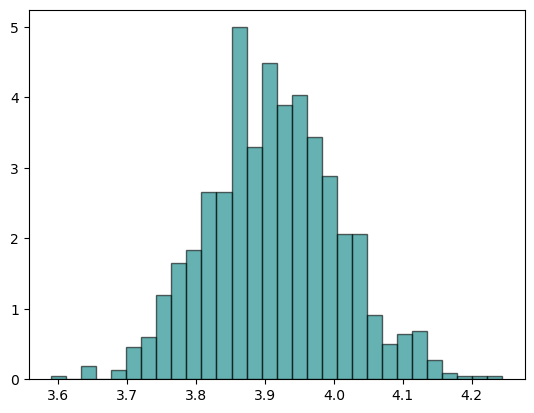

In [18]:
data = np. load(r"C:\Users\keitu\ASTR_3300_S2025\coursework\homeworks\hw_data\hw3_data_1.npy")
measurements, uncertainties = data[:, 0], data[:, 1]

mean_sample = np.mean(measurements)
std_error = np.std(measurements) /np.sqrt(len(measurements))
print(f"Part a: Best Fit Mean: {mean_sample}, Standard Error: {std_error}\n")


def ln_likelihood_gaussian(params, x, sigma):
    mu = params[0]
    return -0.5 * np.sum(((x - mu) / sigma) ** 2 + np.log(2 * np.pi * sigma **2))
res = opt.minimize(lambda p: -ln_likelihood_gaussian(p, measurements, uncertainties), x0 = [mean_sample]) 
best_fit_mu = res.x[0]
print(f"Part b: Best Fit Gaussian mean: {best_fit_mu}\n")


fisher_uncertainty = np.sqrt(1/ np.sum(1/(uncertainties**2)))
print(f"Part c: Fisher Uncertainty: {fisher_uncertainty}\n")



n_bootstrap = 1000
bootstrap_means = np.zeros(n_bootstrap)
for i in range (n_bootstrap):
    indices = np.random.choice(len(measurements), len(measurements), replace=True)
    bootstrap_means[i] = np.sum(measurements[indices] / uncertainties[indices]**2) / np.sum(1/ uncertainties[indices]**2)


plt.figure()
plt.hist(bootstrap_means, bins=30, density=True, alpha=0.6, label = 'Bootstrap means', color = 'teal', edgecolor = 'black')
x = np.linspace(min(bootstrap_means), max(bootstrap_means), 100)
plt.plot(x, stats.norm.pdf(x, weighted_mean, std_error), label = 'Gaussian PDF', color = 'orange', linewidth=2)
plt.axvline(weigthed_mean, color = 'red', linstyle = 'dashed', linewidth = 2 , label = 'Mean Value')
plt.xlabel('Mean')
plt.ylabel('Density')
plt.title('Bootstrap of Sample Mean')
plt.legend()
plt.show()



def ln_likelihood_laplace(params, x):
    mu, delta = params
    return -np.sum(np.abs(x - mu) / delta + np.log(2*delta))

res_laplace = opt.minimize(lambda p: -ln_likelihood_laplace(p, measurements), x0 = [mean_sample, np.std(measurements)])
best_fit_mu_laplace, best_fit_delta = res_laplace.x
print(f" Part 6: Best Fit Laplace parameters: mu = {best_fit_mu_laplace}, delta = {best_fit_delta}\n")



def AIC(log_likelihood, k):
    return 2 * k-2 * log_likelihood

aic_gaussian = AIC(-res.fun, 1)
aic_laplace = AIC(-res_laplace.fun, 2)
print(f" Part 7: AIC Gaussian: {aic_gaussian}, AIC Laplace: {aic_laplace}")
    
